In this Notebook we will assess the correlation between the model ensemble and the interaction data. NOTE: These plots are useful to make sure the matrices have no major dissimilarities, and to ensure there are no regions being wrongly modelled.

# Libraries and functions 

In [1]:
from pytadbit.modelling.structuralmodels import StructuralModels,load_structuralmodels
import cPickle as pickle
import sys

# Parameters to modify 

In [2]:
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/SparseDataModelling/'
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# wether to store or not plots
saveFig = False

# Run 

## Define needed paths

In [3]:
# Define needed paths and create plots folder
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/matrixComp/'
! mkdir -p {outplot}

## Import additional libraries 

In [4]:
sys.path.append(basePath + 'code')
import fileHandling

## Comparing model ensemble with experimental data

This code will load the model files and region data

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')
                
## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

As an example of an interaction pattern that could drive to poor modelling of the enclosed region we can see the matrix interactions around bin 800. Even if we dont have interaction data, the region should had been reconstructed in more coherence with the surrounding area, however this didnt happen in this case. This issue comes as a consequence of a mapping issue we had involving haplotypes from the refence genome. This resulted in highly biased interaction values surrounded by an area totally devoid of interactions that drove this region away from the core of the model. Since anyway the region didn't seem to fell linearly or spatially close to the b-globin region in Ery we continued with it.

/home/julen/TADdyn/SparseDataModelling/models/Ery/b-globin/Ery_b-globin_C200.0L0.0U0.0M300Res5000.models


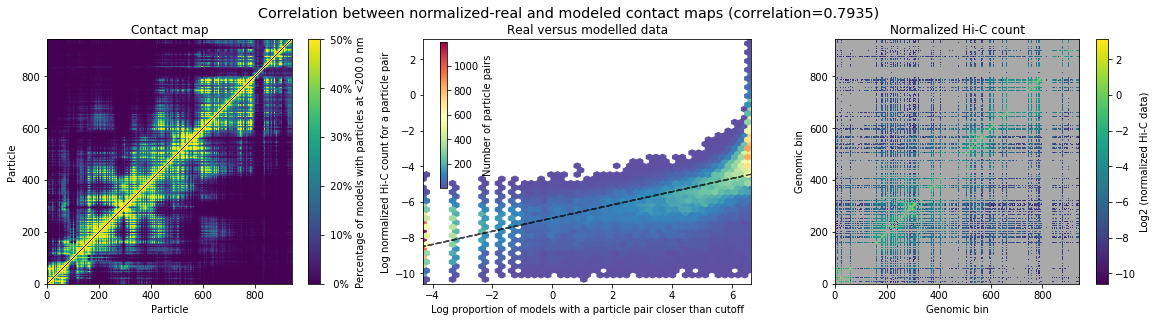

/home/julen/TADdyn/SparseDataModelling/models/Mon/b-globin/Mon_b-globin_C200.0L-0.5U0.0M300Res5000.models


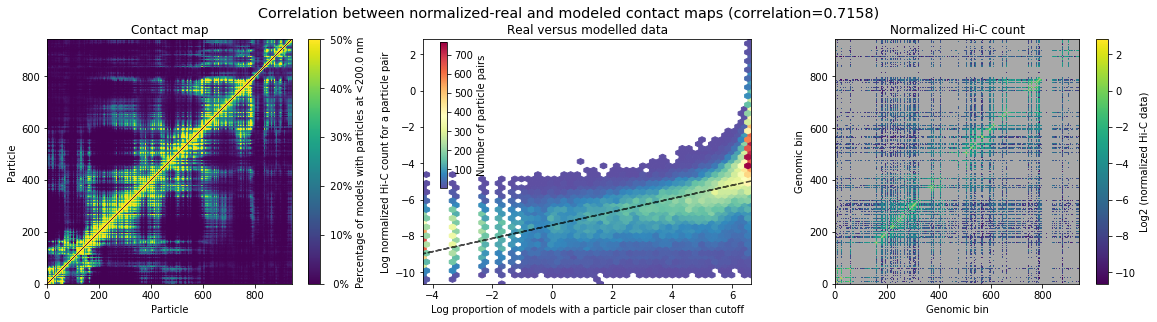

/home/julen/TADdyn/SparseDataModelling/models/nCD4/b-globin/nCD4_b-globin_C200.0L0.0U0.0M300Res5000.models


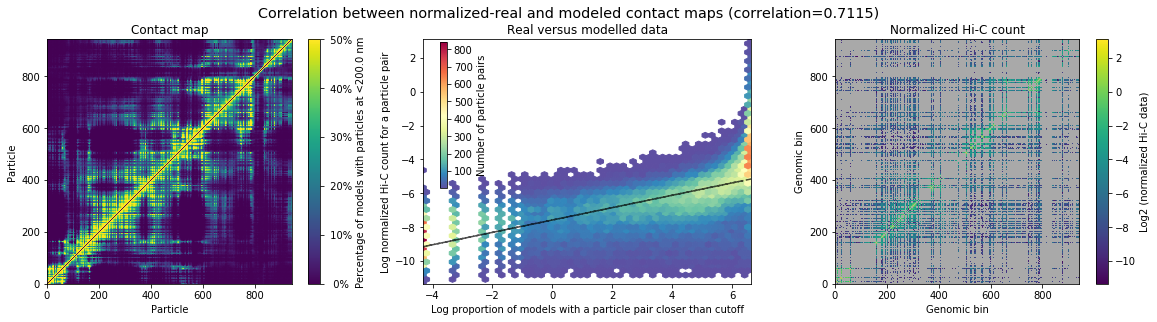

In [6]:
correlationData = {}
for cell in cells:
    correlationData[cell] = {}
    for regi in models[cell]:
        fi = models[cell][regi]
        print(fi)
        mods = load_structuralmodels(fi)
        # keep the amount of selected models
        mods.define_best_models(modelsKeep)
        cutoff = float(fi.split('_C')[-1].split('L')[0])

        # We will avoid showing bad columns (show_bad_columns) because in pcHiC
        # can be most of the matrix
        if saveFig == True:

            tempPath =  outplot + 'modelMatrixCor_%s_%s.pdf' %(cell, regi)
            corTot = mods.correlate_with_real_data(plot=True, cutoff=cutoff, savefig=tempPath,
                                                  show_bad_columns=False)[0]


        else:

            corTot = mods.correlate_with_real_data(plot=True, cutoff=cutoff,
                                                  show_bad_columns=False)[0]

        correlationData[cell][regi] = corTot

In [7]:
print correlationData

{'nCD4': {'b-globin': SpearmanrResult(correlation=0.7114735604094887, pvalue=0.0)}, 'Ery': {'b-globin': SpearmanrResult(correlation=0.7935015848935844, pvalue=0.0)}, 'Mon': {'b-globin': SpearmanrResult(correlation=0.7157674032530627, pvalue=0.0)}}
